In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import libs

In [2]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

colorslist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [3]:
Uds = np.array([2.0, 5.0, 10.0])
PopulationSize = [100, 1000, 10000]
human_popsize = 10000
sd = -10**(-np.linspace(1, 2.5, 10))
iterations = 1000

Kimetalsd = -0.009
Boykoetalsd = -0.029

#x is the number of segregating mutations per individual
xmean = -Uds[1]/sd
Kim_xmean = -Uds/Kimetalsd
Boyko_xmean = -Uds/Boykoetalsd


R_epistasis = np.linspace(0.9, 1.1, 100)

print(Kim_xmean[0])


222.22222222222223


In [4]:
#Make a test of growth rate and selective deaths functions using Boyko et al sd and human Ud=2
expected_min_Kim, std_error_min_Kim, expected_max_Kim, std_error_max_Kim = libs.get_expected_min_max_poisson_sample(Kim_xmean[1], human_popsize, iterations)
testR_epistasis = 0.9
print(expected_min_Kim)
expected_term = libs.get_expected_overA(Kim_xmean[1], expected_min_Kim, expected_max_Kim, testR_epistasis)
print(libs.get_growht_rate(expected_min_Kim, Kimetalsd, testR_epistasis, expected_term))

print(Kim_xmean[1])
expected_term = libs.get_expected_overA(Kim_xmean[1], expected_min_Kim, expected_max_Kim, testR_epistasis)
print(libs.get_growht_rate(Kim_xmean[1], Kimetalsd, testR_epistasis, expected_term))

print(expected_max_Kim)
expected_term = libs.get_expected_overA(Kim_xmean[1], expected_min_Kim, expected_max_Kim, testR_epistasis)
print(libs.get_growht_rate(expected_max_Kim, Kimetalsd, testR_epistasis, expected_term))

print(libs.get_selective_deaths(Kim_xmean[1], expected_min_Kim, expected_max_Kim, Kimetalsd, testR_epistasis))

466.77
56.1992857622556
555.5555555555555
-0.08512671828528971
648.423
-0.08999972556449004
1.0


In [5]:
# Generate samples of min and max invidviduals with varying population sizes
expected_min_N0, std_error_min_N0, expected_max_N0, std_error_max_N0 = libs.vget_expected_min_max_poisson_sample(xmean, PopulationSize[0], iterations)
expected_min_N1, std_error_min_N1, expected_max_N1, std_error_max_N1 = libs.vget_expected_min_max_poisson_sample(xmean, PopulationSize[1], iterations)
expected_min_N2, std_error_min_N2, expected_max_N2, std_error_max_N2 = libs.vget_expected_min_max_poisson_sample(xmean, PopulationSize[2], iterations)

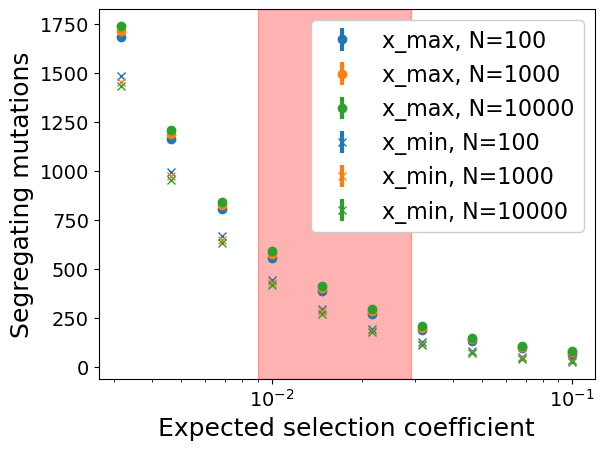

In [6]:
N_sizes = [str(PopulationSize[0]), str(PopulationSize[1]), str(PopulationSize[2])]

data_segregating = {
    (str(PopulationSize[0]), 'x_max'): (expected_max_N0, std_error_max_N0),
    (str(PopulationSize[1]), 'x_max'): (expected_max_N1, std_error_max_N1),
    (str(PopulationSize[2]), 'x_max'): (expected_max_N2, std_error_max_N2),
    (str(PopulationSize[0]), 'x_min'): (expected_min_N0, std_error_min_N0),
    (str(PopulationSize[1]), 'x_min'): (expected_min_N1, std_error_min_N1),
    (str(PopulationSize[2]), 'x_min'): (expected_min_N2, std_error_min_N2),
}

color_map = {str(PopulationSize[0]): '#1f77b4', str(PopulationSize[1]): '#ff7f0e', str(PopulationSize[2]): '#2ca02c'}
marker_map = {'x_max': 'o', 'x_min': 'x'}


for (N, value_type), (y, yerr) in data_segregating.items():
    plt.errorbar(-sd, y, yerr=yerr, fmt=marker_map[value_type], color=color_map[N], label=f'{value_type}, N={N}')

plt.xscale('log')
plt.xlabel('Expected selection coefficient')
plt.ylabel('Segregating mutations')
plt.axvspan(-Kimetalsd, -Boykoetalsd, color='r', alpha=0.3)
plt.legend(framealpha=1)
plt.savefig('graphs/Expectedminxmaxx.png', bbox_inches='tight') 

In [14]:
Wbest_Kim = np.zeros((len(Uds), len(R_epistasis)))
twotimesWbest_Kim = np.zeros((len(Uds), len(R_epistasis)))
selective_deaths_Kim = np.zeros((len(Uds), len(R_epistasis)))
fitness_variance_Kim = np.zeros((len(Uds), len(R_epistasis)))

# Calculate selective deaths for each Uds and R_epistasis
for i in range(len(Uds)):
    expected_min_Kim, std_error_min_Kim, expected_max_Kim, std_error_max_Kim = libs.get_expected_min_max_poisson_sample(Kim_xmean[i], human_popsize, iterations)
    for j in range(len(R_epistasis)):
        selective_deaths_Kim[i, j] = libs.get_selective_deaths(Kim_xmean[i], expected_min_Kim, expected_max_Kim, Kimetalsd, R_epistasis[j])
        Wbest_Kim[i, j] = libs.get_best_fitness(Kim_xmean[i], expected_min_Kim, expected_max_Kim, Kimetalsd, R_epistasis[j])        
        twotimesWbest_Kim[i, j] = 2*Wbest_Kim[i, j]
        fitness_variance_Kim[i, j] = libs.get_fitness_variance(Kim_xmean[i], expected_min_Kim, expected_max_Kim, Kimetalsd, R_epistasis[j])

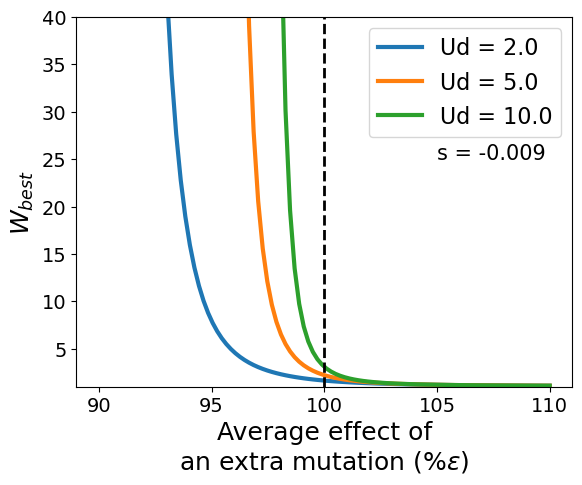

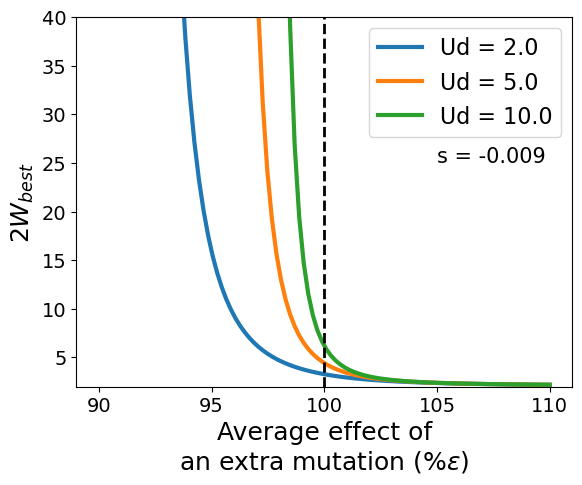

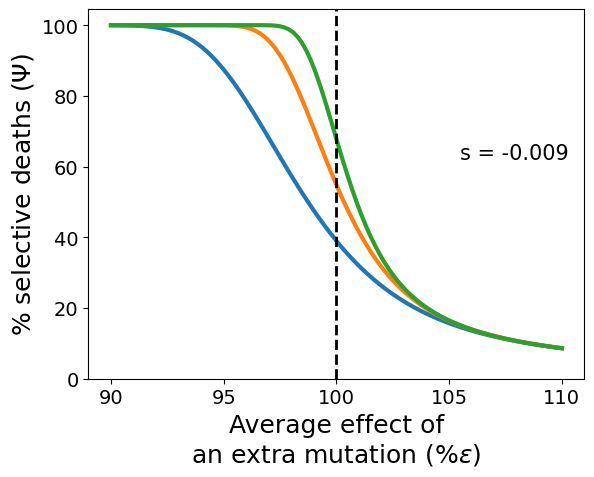

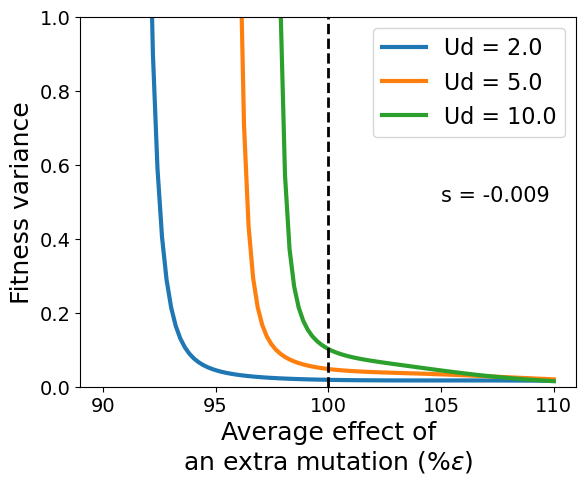

In [20]:
x_values = [0.9, 0.95, 1.0, 1.05, 1.1]
x_labels = ['90', '95', '100', '105', '110']
y_values = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_labels = ['0', '20', '40', '60', '80', '100']

fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis, Wbest_Kim[0], color = colorslist[0], label="Ud = " + str(Uds[0]))
ax.plot(R_epistasis, Wbest_Kim[1], color = colorslist[1], label="Ud = " + str(Uds[1]))
ax.plot(R_epistasis, Wbest_Kim[2], color = colorslist[2], label="Ud = " + str(Uds[2]))
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.5, 0.75)])
#ax.set_yscale('log', base=10, subs=[10**x for x in (2, 5, 20)])
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.set_ylim(1, 40)
ax.set_xlabel('Average effect of\nan extra mutation (%' + r'$\epsilon$' + ')')
ax.set_ylabel(r'$W_{best}$')
ax.text(1.05, 25, "s = " + str(Kimetalsd), fontsize=15)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)
#ax.axhline(y=2, color='black', linestyle='dotted', linewidth=2)  # Vertical line at x=2
ax.legend()

fig.savefig('graphs/Wbest_Kim.png', bbox_inches='tight') 
plt.show()
plt.close()

fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis, twotimesWbest_Kim[0], color = colorslist[0], label="Ud = " + str(Uds[0]))
ax.plot(R_epistasis, twotimesWbest_Kim[1], color = colorslist[1], label="Ud = " + str(Uds[1]))
ax.plot(R_epistasis, twotimesWbest_Kim[2], color = colorslist[2], label="Ud = " + str(Uds[2]))
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.5, 0.75)])
#ax.set_yscale('log', base=10, subs=[10**x for x in (2, 5, 20)])
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.set_ylim(2, 40)
ax.set_xlabel('Average effect of\nan extra mutation (%' + r'$\epsilon$' + ')')
ax.set_ylabel(r'$2W_{best}$')
ax.text(1.05, 25, "s = " + str(Kimetalsd), fontsize=15)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)
#ax.axhline(y=2, color='black', linestyle='dotted', linewidth=2)  # Vertical line at x=2
ax.legend()

fig.savefig('graphs/Reproductivenumber_Kim.png', bbox_inches='tight') 
plt.show()
plt.close()

fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis, selective_deaths_Kim[0], color = colorslist[0], label="Ud = " + str(Uds[0]))
ax.plot(R_epistasis, selective_deaths_Kim[1], color = colorslist[1], label="Ud = " + str(Uds[1]))
ax.plot(R_epistasis, selective_deaths_Kim[2], color = colorslist[2], label="Ud = " + str(Uds[2]))
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.25, 0.5, 0.75)])
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.yaxis.set_ticks(y_values)
ax.yaxis.set_ticklabels(y_labels)
ax.set_xlabel('Average effect of\nan extra mutation (%' + r'$\epsilon$' + ')')
ax.set_ylabel('% selective deaths ' + r'$(\Psi)$')
ax.text(1.055, 0.62, "s = " + str(Kimetalsd), fontsize=15)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)  # Vertical line at x=2
#ax.legend()

fig.savefig('graphs/Selectivedeaths_Kim.png', bbox_inches='tight') 
plt.show()
plt.close()

fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis, fitness_variance_Kim[0], color = colorslist[0], label="Ud = " + str(Uds[0]))
ax.plot(R_epistasis, fitness_variance_Kim[1], color = colorslist[1], label="Ud = " + str(Uds[1]))
ax.plot(R_epistasis, fitness_variance_Kim[2], color = colorslist[2], label="Ud = " + str(Uds[2]))
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.5, 0.75)])
#ax.set_yscale('log', base=10, subs=[10**x for x in (2, 5, 20)])
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.set_ylim(0, 1)
ax.set_xlabel('Average effect of\nan extra mutation (%' + r'$\epsilon$' + ')')
ax.set_ylabel('Fitness variance')
ax.text(1.05, 0.5, "s = " + str(Kimetalsd), fontsize=15)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)
#ax.axhline(y=2, color='black', linestyle='dotted', linewidth=2)  # Vertical line at x=2
ax.legend()

fig.savefig('graphs/Fitnessvariance_Kim.png', bbox_inches='tight') 
plt.show()
plt.close()

In [9]:
Wbest_Boyko = np.zeros((len(Uds), len(R_epistasis)))
twotimesWbest_Boyko = np.zeros((len(Uds), len(R_epistasis)))
selective_deaths_Boyko = np.zeros((len(Uds), len(R_epistasis)))
# Calculate selective deaths for each Uds and R_epistasis
for i in range(len(Uds)):
    expected_min_Boyko, std_error_min_Boyko, expected_max_Boyko, std_error_max_Boyko = libs.get_expected_min_max_poisson_sample(Boyko_xmean[i], human_popsize, iterations)
    for j in range(len(R_epistasis)):
        selective_deaths_Boyko[i, j] = libs.get_selective_deaths(Boyko_xmean[i], expected_min_Boyko, expected_max_Boyko, Boykoetalsd, R_epistasis[j])
        Wbest_Boyko[i, j] = libs.get_best_fitness(Boyko_xmean[i], expected_min_Boyko, expected_max_Boyko, Boykoetalsd, R_epistasis[j])       
        twotimesWbest_Boyko[i, j] = 2*Wbest_Kim[i, j]


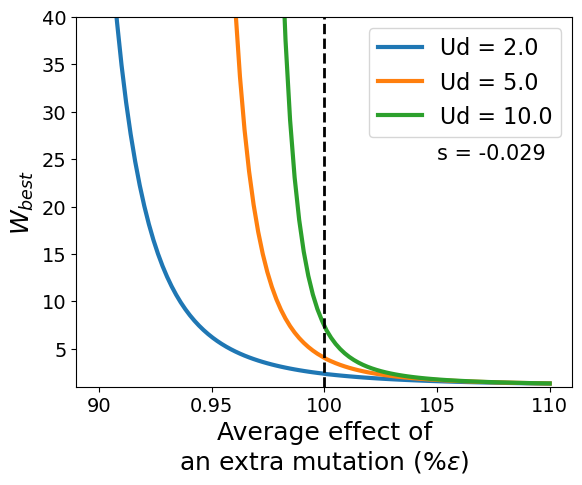

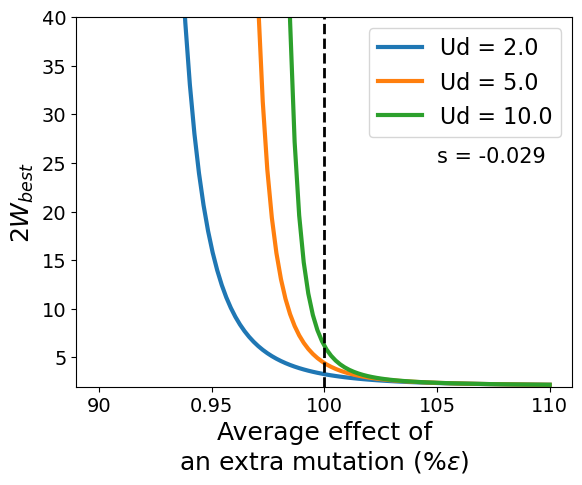

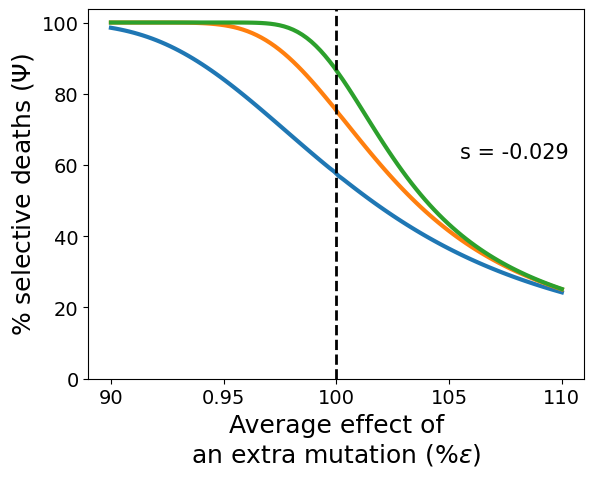

In [10]:
x_values = [0.9, 0.95, 1.0, 1.05, 1.1]
x_labels = ['90', '0.95', '100', '105', '110']
y_values = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_labels = ['0', '20', '40', '60', '80', '100']

fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis, Wbest_Boyko[0], color = colorslist[0], label="Ud = " + str(Uds[0]))
ax.plot(R_epistasis, Wbest_Boyko[1], color = colorslist[1], label="Ud = " + str(Uds[1]))
ax.plot(R_epistasis, Wbest_Boyko[2], color = colorslist[2], label="Ud = " + str(Uds[2]))
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.5, 0.75)])
#ax.set_yscale('log', base=10, subs=[10**x for x in (2, 5, 20)])
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.set_ylim(1, 40)
ax.set_xlabel('Average effect of\nan extra mutation (%' + r'$\epsilon$' + ')')
ax.set_ylabel(r'$W_{best}$')
ax.text(1.05, 25, "s = " + str(Boykoetalsd), fontsize=15)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)
#ax.axhline(y=2, color='black', linestyle='dotted', linewidth=2)  # Vertical line at x=2
ax.legend()

fig.savefig('graphs/Wbest_Boyko.png', bbox_inches='tight') 
plt.show()
plt.close()

fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis, twotimesWbest_Boyko[0], color = colorslist[0], label="Ud = " + str(Uds[0]))
ax.plot(R_epistasis, twotimesWbest_Boyko[1], color = colorslist[1], label="Ud = " + str(Uds[1]))
ax.plot(R_epistasis, twotimesWbest_Boyko[2], color = colorslist[2], label="Ud = " + str(Uds[2]))
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.5, 0.75)])
#ax.set_yscale('log', base=10, subs=[10**x for x in (2, 5, 20)])
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.set_ylim(2, 40)
ax.set_xlabel('Average effect of\nan extra mutation (%' + r'$\epsilon$' + ')')
ax.set_ylabel(r'$2W_{best}$')
ax.text(1.05, 25, "s = " + str(Boykoetalsd), fontsize=15)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)
#ax.axhline(y=2, color='black', linestyle='dotted', linewidth=2)  # Vertical line at x=2
ax.legend()

fig.savefig('graphs/Reproductivenumber_Boyko.png', bbox_inches='tight') 
plt.show()
plt.close()

fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis, selective_deaths_Boyko[0], color = colorslist[0], label="Ud = " + str(Uds[0]))
ax.plot(R_epistasis, selective_deaths_Boyko[1], color = colorslist[1], label="Ud = " + str(Uds[1]))
ax.plot(R_epistasis, selective_deaths_Boyko[2], color = colorslist[2], label="Ud = " + str(Uds[2]))
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.25, 0.5, 0.75)])
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.yaxis.set_ticks(y_values)
ax.yaxis.set_ticklabels(y_labels)
ax.set_xlabel('Average effect of\nan extra mutation (%' + r'$\epsilon$' + ')')
ax.set_ylabel('% selective deaths ' + r'$(\Psi)$')
ax.text(1.055, 0.62, "s = " + str(Boykoetalsd), fontsize=15)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)  # Vertical line at x=2
#ax.legend()

fig.savefig('graphs/Selectivedeaths_Boyko.png', bbox_inches='tight') 
plt.show()
plt.close()
